# 

In [334]:
import rdflib
from rdflib import RDF, OWL, RDFS
from rdflib.plugins import sparql
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

In [335]:
dicSchemas = {
    'Ornitho': 'http://www.semanticweb.org/mbunel/ontologies/Ornitho#',
    'owl':OWL,
    'rdf': RDF,
    'rdfs' : RDFS
}

In [243]:
g = rdflib.Graph()
result = g.parse("/home/mbunel/Documents/Code/Ruitor/data/ontologies/relations_spatiales.owl")

In [244]:
G = rdflib_to_networkx_multidigraph(result)

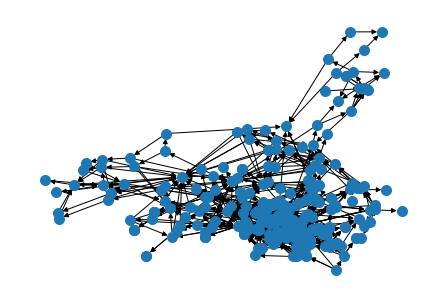

In [248]:
# Plot Networkx instance of RDF Graph
#pos = nx.spring_layout(G, scale=2)
#edge_labels = nx.get_edge_attributes(G, 'r')
#nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)$
params = {
    'node_size':100,
    
} 
nx.draw_kamada_kawai(G, **params)

In [123]:
ref = rdflib.URIRef("http://www.semanticweb.org/mbunel/ontologies/Ornitho#DistanceQuantitative")

In [149]:
q = sparql.prepareQuery("""
SELECT ?rsa ?p ?a ?b
WHERE {
    VALUES ?p { Ornitho:hasSelector Ornitho:hasMetric}
    ?rsa ?p ?a.
    ?a Ornitho:pythonName ?b
    }""", initNs = {
    'Ornitho': 'http://www.semanticweb.org/mbunel/ontologies/Ornitho#'})

In [358]:
q = sparql.prepareQuery("""
SELECT ?rs ?rsa ?lnk ?val ?pn
WHERE {
    ?rs Ornitho:hasRelationSpatialeAtomique ?rsa.
    ?rsa ?lnk ?val.
    ?val Ornitho:pythonName ?pn
    VALUES ?lnk {Ornitho:hasSelector Ornitho:hasMetric}
}""", initNs = dicSchemas)

In [361]:
q = sparql.prepareQuery("""
SELECT ?a ?b

WHERE {
    ?a rdfs:subClassOf* Ornitho:Objet_Python.
    ?b a ?a
}""", initNs = dicSchemas)

In [362]:
rs = rdflib.URIRef("http://www.semanticweb.org/mbunel/ontologies/Ornitho#rs_SousProcheDe")
qres = g.query(q, initBindings={'res': ref, 'rs': rs})

In [363]:
list(qres)

[(rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Selecteur'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#SelecteurNull')),
 (rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#EcartValeur'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#DeltaVal')),
 (rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#EcartAltitude'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#DAlt')),
 (rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Distance'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#DistanceTchebychev')),
 (rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Distance'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#DistanceMahnattan')),
 (rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Distance'),
  rdflib.

In [228]:
nn = rdflib.Namespace("http://www.semanticweb.org/mbunel/ontologies/Ornitho#")

In [229]:
ss = nn.Relation_spatiale_atomique
am = nn.hasMetric

In [230]:
am

rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#hasMetric')

In [87]:
for i in qres:
    print("%-50s %-15s %s" % (*[j.split('#')[-1] for j in i],))

Relation_spatiale_atomique                         type            Class
Relation_spatiale_atomique                         type            Class
Relation_spatiale_atomique                         subClassOf      N58a3e2dbc14e4334ba282f85bae37ae3
Relation_spatiale_atomique                         subClassOf      N58a3e2dbc14e4334ba282f85bae37ae3
Relation_spatiale_atomique                         abbreviation    r.s.a.
Relation_spatiale_atomique                         abbreviation    r.s.a.
Relation_spatiale_atomique                         label           Relation spatiale atomique
Relation_spatiale_atomique                         label           Relation spatiale atomique
Relation_spatiale_atomique                         subClassOf      N645a643fe34646568626037798ec221e
Relation_spatiale_atomique                         subClassOf      N645a643fe34646568626037798ec221e
Relation_spatiale_atomique                         abbreviation    a.s.r.
Relation_spatiale_atomique              

In [1]:
from owlready2 import *

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
ontho = get_ontology("/home/mbunel/Documents/Code/Ruitor/data/ontologies/relations_spatiales.owl")

In [3]:
ontho.load()

get_ontology("http://www.semanticweb.org/mbunel/ontologies/Ornitho#")

In [4]:
for ch in ontho.Relation_spatiale_atomique.descendants():
    met = ch.hasMetrique
    sel = ch.hasSelector
    print(met, sel)

[] []
[relations_spatiales.Metrique] [relations_spatiales.Selecteur]
[relations_spatiales.Distance] [relations_spatiales.Selecteur]


In [5]:
v = list(ontho.Relation_spatiale_atomique.descendants())

In [6]:
v

[relations_spatiales.DistanceQuantitative,
 relations_spatiales.Relation_spatiale_atomique,
 relations_spatiales.Contact]

In [11]:
name = v[2].hasSelector[0].pythonName[0]

In [12]:
name

'Selector'

In [18]:
class Selector:
    def oyh(self):
        print("oyh")

In [22]:
locals()[name]

__main__.Selector

In [17]:
globals()[name]().oyh()

oyh
